In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial-infarction.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('target')
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej (target)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('OS_SL_W' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (OS_SL_W)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'target'], axis=1) # Cechy dla obu modeli
y_regression = data['OS_SL_W'] # Zmienna docelowa dla regresji
y_classification = data['target'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
pip install seaborn

<class 'OSError'>: Not available

In [3]:
pip3 install seaborn

<class 'SyntaxError'>: invalid syntax (<ipython-input-3-1f5edf89b6ec>, line 1)

In [4]:
!pip install seaborn

<class 'OSError'>: Not available

In [5]:
import seaborn as sns

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [1]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi
df.fillna(df.mean(), inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dla zmiennej zależnej (np. komplikacji po zawale)
sns.histplot(df["KFK_BLOOD"], bins=30, kde=True)
plt.show()
from sklearn.model_selection import train_test_split

X = df.drop(columns=["KFK_BLOOD"])  # Wszystkie cechy niezależne
y = df["KFK_BLOOD"]  # Zmienna zależna

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzenie modelu
model = LinearRegression()

# Trenowanie
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt
import seaborn as sns

# Wybór jednej zmiennej do regresji (np. L_BLOOD)
X_single = X_train[["L_BLOOD"]]  # Wybór tylko wieku jako predyktora
model_single = LinearRegression()
model_single.fit(X_single, y_train)

# Predykcja
y_pred_single = model_single.predict(X_test[["L_BLOOD"]])

# Wizualizacja regresji
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["L_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.lineplot(x=X_test["L_BLOOD"], y=y_pred_single, color="red", label="Regresja liniowa")
plt.xlabel("L_BLOOD")
plt.ylabel("KFK_BLOOD")
plt.title("Regresja liniowa: L_BLOOD a KFK_BLOOD")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
%pip install seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


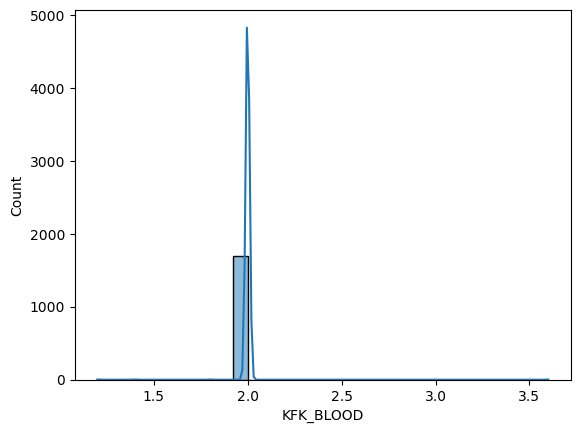

Mean Squared Error: 0.019817952965312025
R² Score: -1.6398361020350163


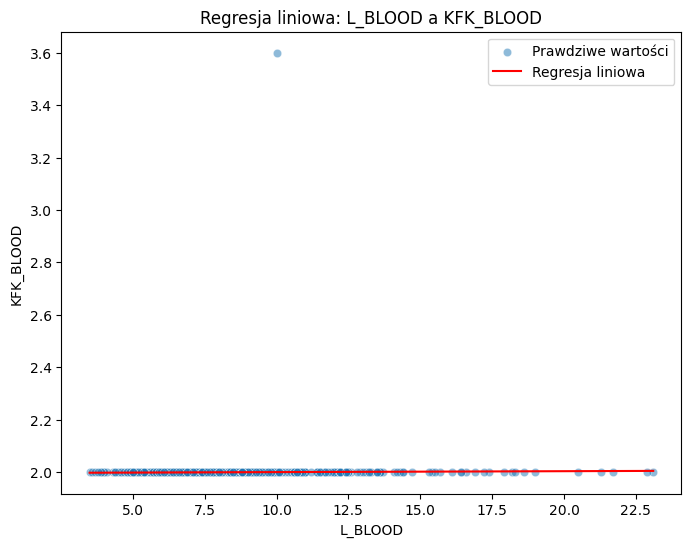

In [3]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi
df.fillna(df.mean(), inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dla zmiennej zależnej (np. komplikacji po zawale)
sns.histplot(df["KFK_BLOOD"], bins=30, kde=True)
plt.show()
from sklearn.model_selection import train_test_split

X = df.drop(columns=["KFK_BLOOD"])  # Wszystkie cechy niezależne
y = df["KFK_BLOOD"]  # Zmienna zależna

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzenie modelu
model = LinearRegression()

# Trenowanie
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt
import seaborn as sns

# Wybór jednej zmiennej do regresji (np. L_BLOOD)
X_single = X_train[["L_BLOOD"]]  # Wybór tylko wieku jako predyktora
model_single = LinearRegression()
model_single.fit(X_single, y_train)

# Predykcja
y_pred_single = model_single.predict(X_test[["L_BLOOD"]])

# Wizualizacja regresji
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["L_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.lineplot(x=X_test["L_BLOOD"], y=y_pred_single, color="red", label="Regresja liniowa")
plt.xlabel("L_BLOOD")
plt.ylabel("KFK_BLOOD")
plt.title("Regresja liniowa: L_BLOOD a KFK_BLOOD")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


<ipython-input-4-8c9888a45447>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["NA_BLOOD"].fillna(df["NA_BLOOD"].mean(), inplace=True)
<ipython-input-4-8c9888a45447>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Accuracy: 0.6588235294117647
Classification Report:


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.66      1.00      0.79       224

    accuracy                           0.66       340
   macro avg       0.33      0.50      0.40       340
weighted avg       0.43      0.66      0.52       340

Confusion Matrix:
[[  0 116]
 [  0 224]]


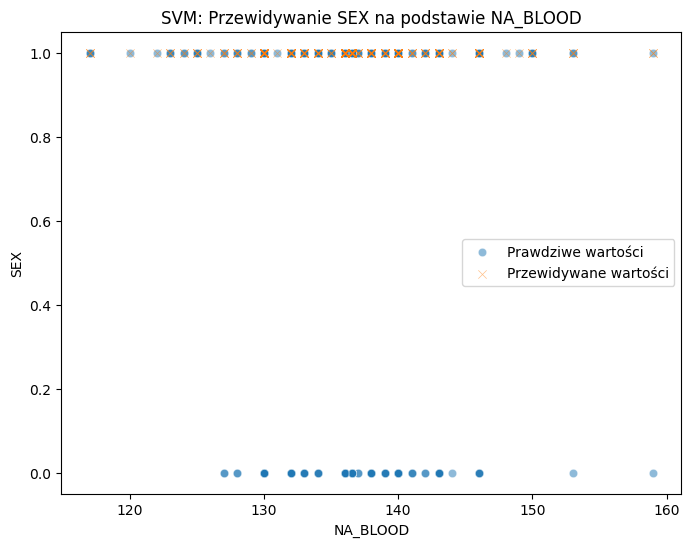

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # SVM dla klasyfikacji
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Do normalizacji cech

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie brakujących wartości średnimi (tylko dla NA_BLOOD)
df["NA_BLOOD"].fillna(df["NA_BLOOD"].mean(), inplace=True)
df["SEX"].fillna(df["SEX"].mode()[0], inplace=True)  # Dla SEX użyjemy najczęściej występującej wartości

# Przygotowanie danych
X = df[["NA_BLOOD"]]  # Tylko NA_BLOOD jako cecha
y = df["SEX"]         # SEX jako zmienna docelowa (kategoryczna)

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja cechy NA_BLOOD (zalecane dla SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tworzenie modelu SVM
model = SVC(kernel="rbf", C=1.0, random_state=42)  # RBF kernel dla nieliniowych zależności

# Trenowanie modelu
model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Wizualizacja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_pred, label="Przewidywane wartości", marker="x", alpha=0.5)
plt.xlabel("NA_BLOOD")
plt.ylabel("SEX")
plt.title("SVM: Przewidywanie SEX na podstawie NA_BLOOD")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


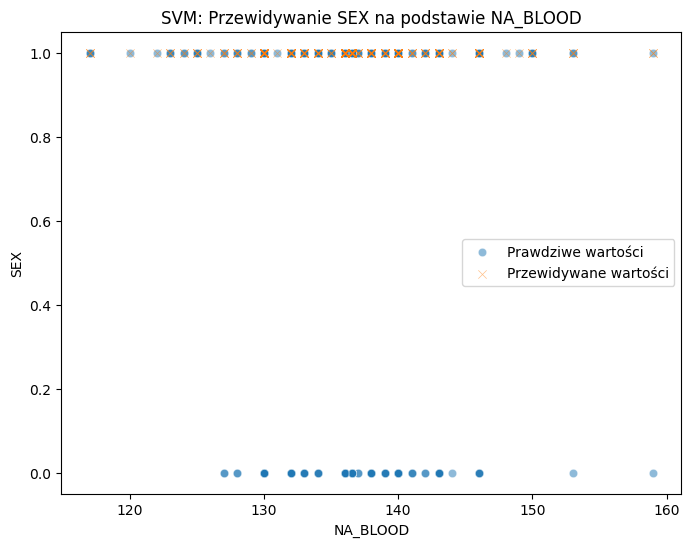

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie informacji
print(df.info())
print(df.head())
print(df.isnull().sum())

# Uzupełnienie brakujących wartości
df["NA_BLOOD"] = df["NA_BLOOD"].fillna(df["NA_BLOOD"].mean())
df["SEX"] = df["SEX"].fillna(df["SEX"].mode()[0])

# Przygotowanie danych
X = df[["NA_BLOOD"]]
y = df["SEX"]

# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
model = SVC(kernel="rbf", C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja
y_pred = model.predict(X_test_scaled)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Rzeczywiste wartości SEX w teście:")
print(y_test.value_counts())
print("Przewidywane wartości SEX:")
print(pd.Series(y_pred).value_counts())
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Dodano zero_division=0
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Wizualizacja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_pred, label="Przewidywane wartości", marker="x", alpha=0.5)
plt.xlabel("NA_BLOOD")
plt.ylabel("SEX")
plt.title("SVM: Przewidywanie SEX na podstawie NA_BLOOD")
plt.legend()
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial-infarction.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('target')
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej (target)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('OS_SL_W' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (OS_SL_W)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'target'], axis=1) # Cechy dla obu modeli
y_regression = data['OS_SL_W'] # Zmienna docelowa dla regresji
y_classification = data['target'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
%pip install seaborn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial-infarction.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('target')
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej (target)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('OS_SL_W' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (OS_SL_W)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'target'], axis=1) # Cechy dla obu modeli
y_regression = data['OS_SL_W'] # Zmienna docelowa dla regresji
y_classification = data['target'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'myocardial-infarction.csv'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial infarction complications.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('target')
print(data['target'].value_counts())
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej (target)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('OS_SL_W' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (OS_SL_W)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'target'], axis=1) # Cechy dla obu modeli
y_regression = data['OS_SL_W'] # Zmienna docelowa dla regresji
y_classification = data['target'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


<class 'KeyError'>: 'target'

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


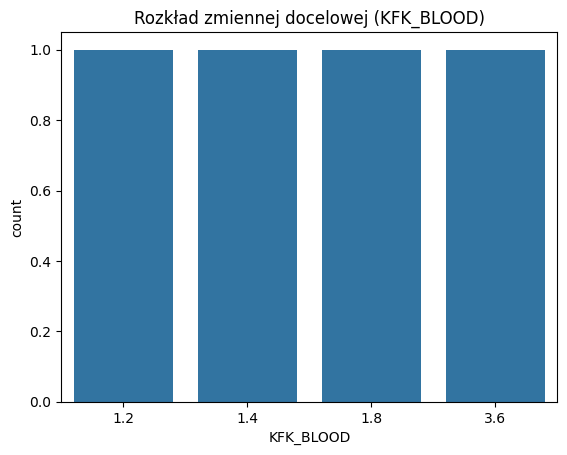

<class 'KeyError'>: 'OS_SL_W'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial infarction complications.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('KFK_BLOOD')
print(data['KFK_BLOOD'].value_counts())
sns.countplot(x='KFK_BLOOD', data=data)
plt.title('Rozkład zmiennej docelowej (KFK_BLOOD)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('OS_SL_W' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (OS_SL_W)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'KFK_BLOOD'], axis=1) # Cechy dla obu modeli
y_regression = data['OS_SL_W'] # Zmienna docelowa dla regresji
y_classification = data['KFK_BLOOD'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


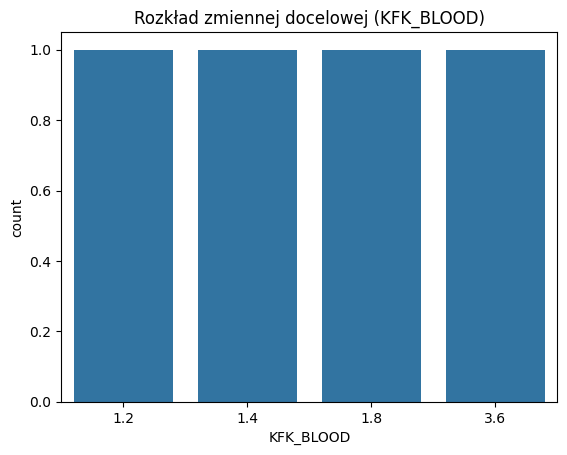

<class 'KeyError'>: 'OS_SL_W'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial infarction complications.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('KFK_BLOOD')
print(data['KFK_BLOOD'].value_counts())
sns.countplot(x='KFK_BLOOD', data=data)
plt.title('Rozkład zmiennej docelowej (KFK_BLOOD)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('L_BLOOD' - Długość pobytu w szpitalu)
sns.histplot(data['OS_SL_W'], kde=True)
plt.title('Rozkład zmiennej docelowej (L_BLOOD)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'KFK_BLOOD'], axis=1) # Cechy dla obu modeli
y_regression = data['L_BLOOD'] # Zmienna docelowa dla regresji
y_classification = data['KFK_BLOOD'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   
4         0.0  ...          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  


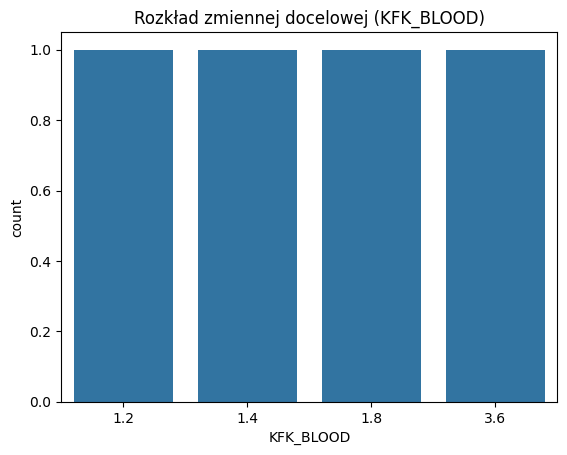

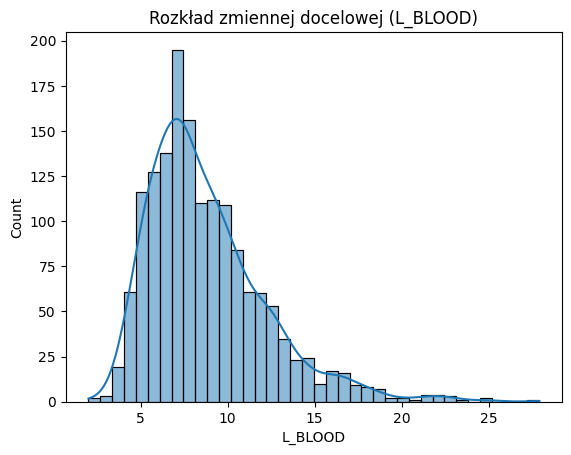

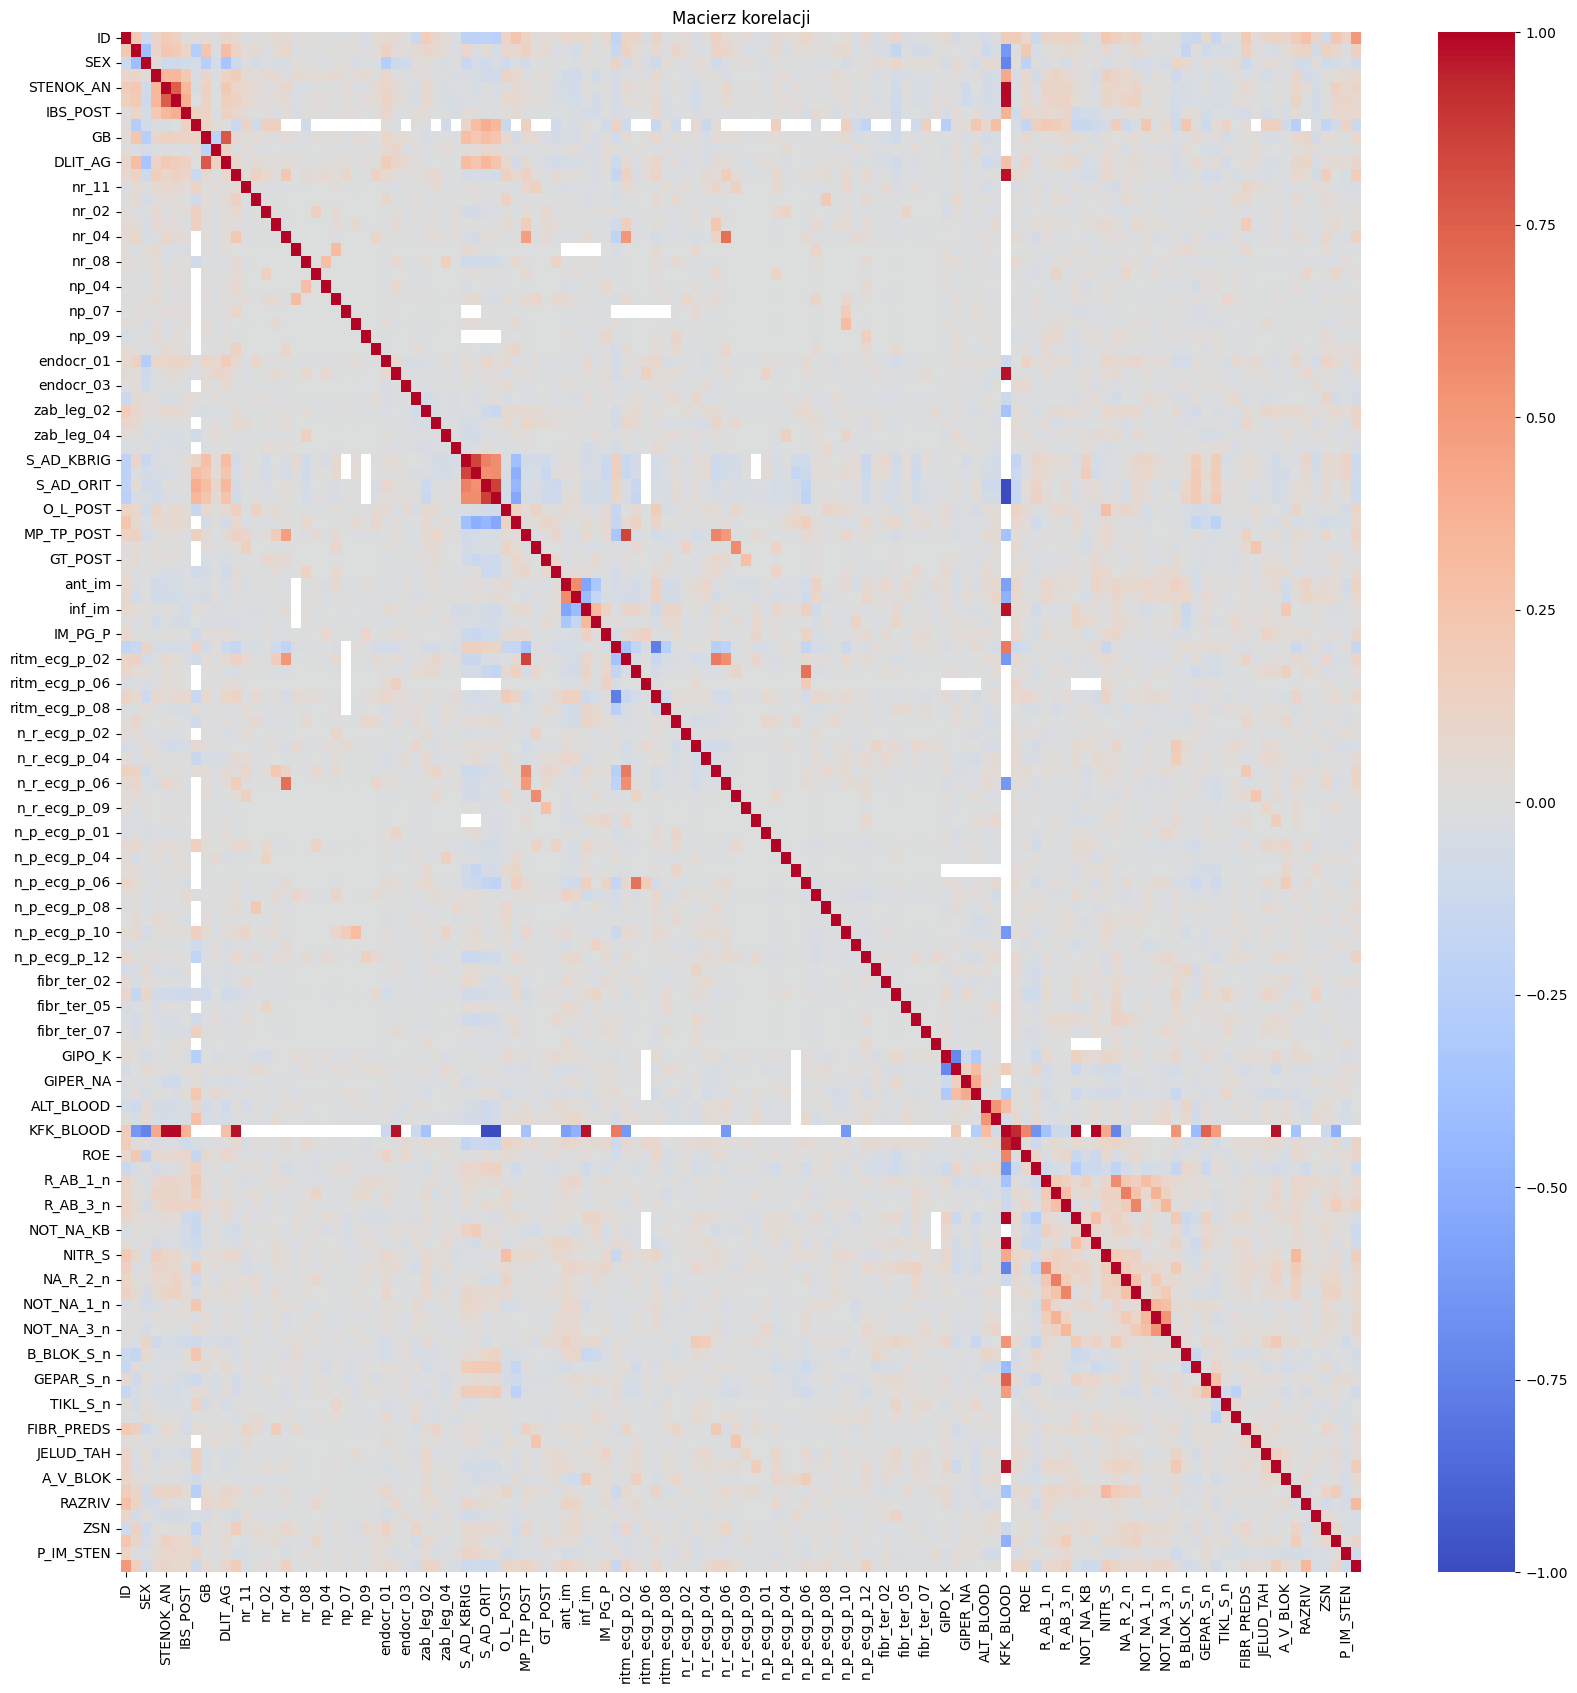

<class 'ValueError'>: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Załaduj dane
data = pd.read_csv('myocardial infarction complications.csv')

# Wyświetl kilka pierwszych wierszy danych
print(data.head())

# Podstawowe informacje o danych
print(data.info())

# Opis statystyczny danych
print(data.describe())

# Sprawdzenie brakujących wartości
print(data.isnull().sum())

# Analiza zmiennej docelowej dla klasyfikacji ('KFK_BLOOD')
print(data['KFK_BLOOD'].value_counts())
sns.countplot(x='KFK_BLOOD', data=data)
plt.title('Rozkład zmiennej docelowej (KFK_BLOOD)')
plt.show()

# Analiza zmiennej docelowej dla regresji ('L_BLOOD' - Długość pobytu w szpitalu)
sns.histplot(data['L_BLOOD'], kde=True)
plt.title('Rozkład zmiennej docelowej (L_BLOOD)')
plt.show()

# Korelacja zmiennych
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Wybór cech i zmiennych docelowych
X = data.drop(['ID', 'KFK_BLOOD'], axis=1) # Cechy dla obu modeli
y_regression = data['L_BLOOD'] # Zmienna docelowa dla regresji
y_classification = data['KFK_BLOOD'] # Zmienna docelowa dla klasyfikacji

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train_regression, y_test_regression, y_train_classification, y_test_classification = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicjalizacja i trening modelu regresji liniowej
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train_regression)

# Predykcja na zbiorze testowym
y_pred_regression = linear_regression_model.predict(X_test_scaled)

# Ocena modelu regresji
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print("--- Model Regresji Liniowej ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Inicjalizacja i trening modelu SVM
svm_model = SVC(probability=True, random_state=42) # probability=True dla ROC AUC
svm_model.fit(X_train_scaled, y_train_classification)

# Predykcja na zbiorze testowym
y_pred_classification = svm_model.predict(X_test_scaled)
y_prob_classification = svm_model.predict_proba(X_test_scaled)[:, 1] # Prawdopodobieństwa dla ROC AUC

# Ocena modelu klasyfikacji
accuracy = accuracy_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
class_report = classification_report(y_test_classification, y_pred_classification)
roc_auc = roc_auc_score(y_test_classification, y_prob_classification)

print("\n--- Model Klasyfikacji SVM ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test_classification, y_prob_classification)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Linia losowa
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


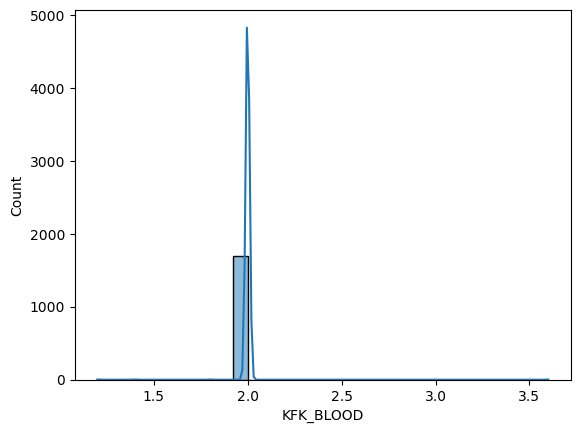

Mean Squared Error: 0.019817952965312025
R² Score: -1.6398361020350163


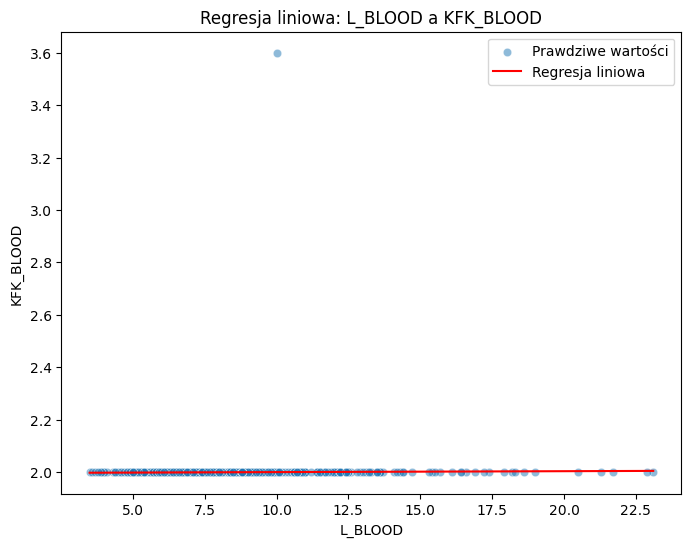

In [8]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi
df.fillna(df.mean(), inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dla zmiennej zależnej (np. komplikacji po zawale)
sns.histplot(df["KFK_BLOOD"], bins=30, kde=True)
plt.show()
from sklearn.model_selection import train_test_split

X = df.drop(columns=["KFK_BLOOD"])  # Wszystkie cechy niezależne
y = df["KFK_BLOOD"]  # Zmienna zależna

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzenie modelu
model = LinearRegression()

# Trenowanie
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt
import seaborn as sns

# Wybór jednej zmiennej do regresji (np. L_BLOOD)
X_single = X_train[["L_BLOOD"]]  # Wybór tylko wieku jako predyktora
model_single = LinearRegression()
model_single.fit(X_single, y_train)

# Predykcja
y_pred_single = model_single.predict(X_test[["L_BLOOD"]])

# Wizualizacja regresji
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["L_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.lineplot(x=X_test["L_BLOOD"], y=y_pred_single, color="red", label="Regresja liniowa")
plt.xlabel("L_BLOOD")
plt.ylabel("KFK_BLOOD")
plt.title("Regresja liniowa: L_BLOOD a KFK_BLOOD")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


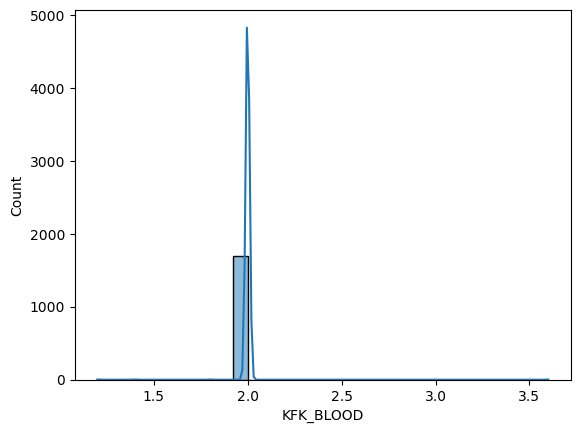

Mean Squared Error: 0.019817952965312025
R² Score: -1.6398361020350163


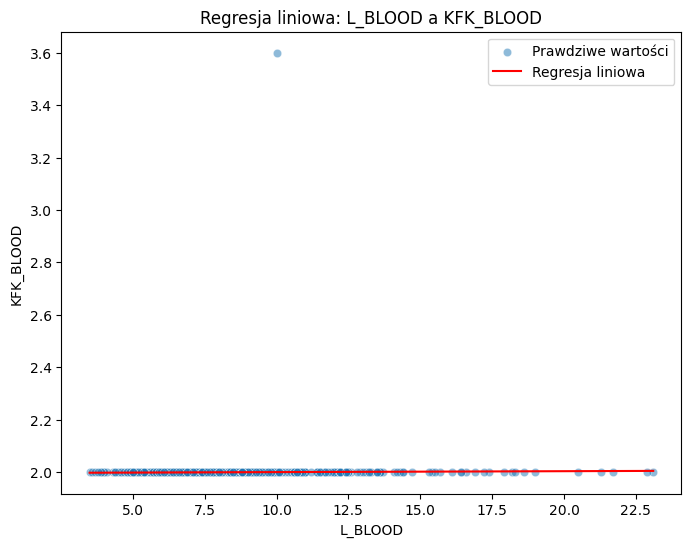

In [9]:
import pandas as pd

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi
df.fillna(df.mean(), inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram dla zmiennej zależnej (np. komplikacji po zawale)
sns.histplot(df["KFK_BLOOD"], bins=30, kde=True)
plt.show()
from sklearn.model_selection import train_test_split

X = df.drop(columns=["KFK_BLOOD"])  # Wszystkie cechy niezależne
y = df["KFK_BLOOD"]  # Zmienna zależna

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Tworzenie modelu
model = LinearRegression()

# Trenowanie
model.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt
import seaborn as sns

# Wybór jednej zmiennej do regresji (np. L_BLOOD)
X_single = X_train[["L_BLOOD"]]  # Wybór tylko wieku jako predyktora
model_single = LinearRegression()
model_single.fit(X_single, y_train)

# Predykcja
y_pred_single = model_single.predict(X_test[["L_BLOOD"]])

# Wizualizacja regresji
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["L_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.lineplot(x=X_test["L_BLOOD"], y=y_pred_single, color="red", label="Regresja liniowa")
plt.xlabel("L_BLOOD")
plt.ylabel("KFK_BLOOD")
plt.title("Regresja liniowa: L_BLOOD a KFK_BLOOD")
plt.legend()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


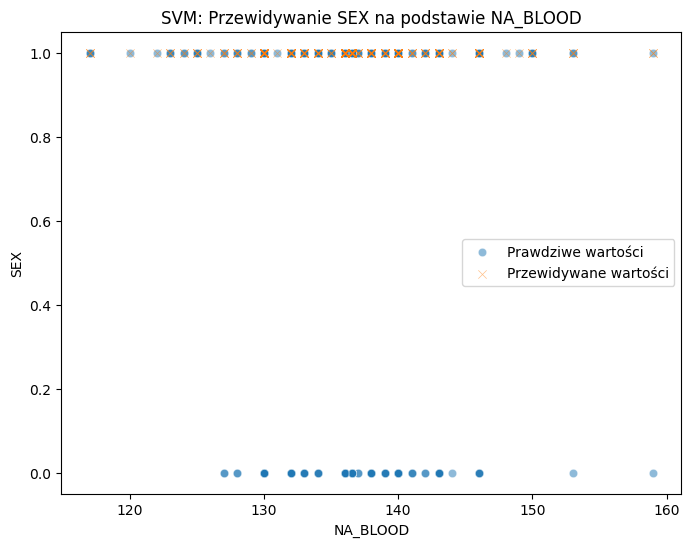

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie informacji
print(df.info())
print(df.head())
print(df.isnull().sum())

# Uzupełnienie brakujących wartości
df["NA_BLOOD"] = df["NA_BLOOD"].fillna(df["NA_BLOOD"].mean())
df["SEX"] = df["SEX"].fillna(df["SEX"].mode()[0])

# Przygotowanie danych
X = df[["NA_BLOOD"]]
y = df["SEX"]

# Podział na zbiory
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
model = SVC(kernel="rbf", C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

# Predykcja
y_pred = model.predict(X_test_scaled)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Rzeczywiste wartości SEX w teście:")
print(y_test.value_counts())
print("Przewidywane wartości SEX:")
print(pd.Series(y_pred).value_counts())
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Dodano zero_division=0
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Wizualizacja
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.scatterplot(x=X_test["NA_BLOOD"], y=y_pred, label="Przewidywane wartości", marker="x", alpha=0.5)
plt.xlabel("NA_BLOOD")
plt.ylabel("SEX")
plt.title("SVM: Przewidywanie SEX na podstawie NA_BLOOD")
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0          0       0   


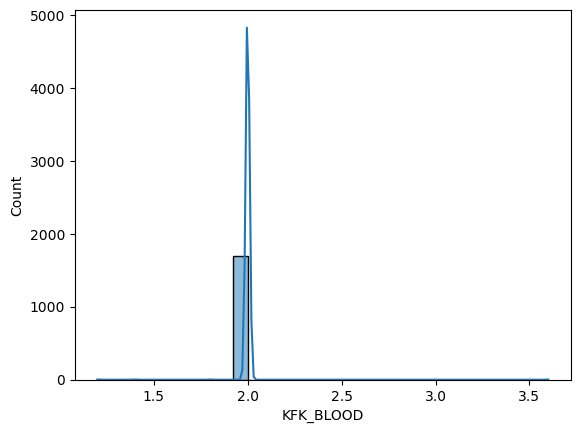

Mean Squared Error: 0.01981795296529701
R² Score: -1.639836102033016


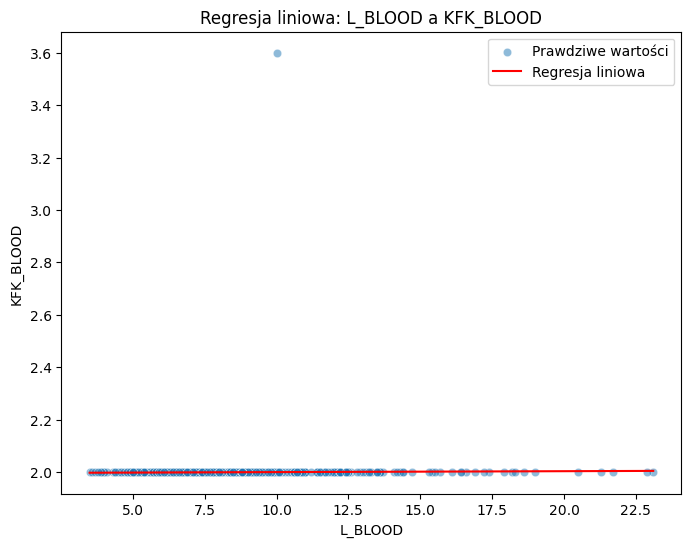

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Dodano dla normalizacji

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(df.info())
print(df.head())
# Sprawdzenie brakujących wartości
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi (poprawiono zapis Pandas)
df = df.fillna(df.mean())

# Histogram dla zmiennej zależnej
sns.histplot(df["KFK_BLOOD"], bins=30, kde=True)
plt.show()

# Przygotowanie danych
X = df.drop(columns=["KFK_BLOOD"])  # Wszystkie cechy niezależne
y = df["KFK_BLOOD"]  # Zmienna zależna

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Normalizacja zbioru treningowego
X_test_scaled = scaler.transform(X_test)        # Normalizacja zbioru testowego (na bazie treningowego)

# Tworzenie modelu
model = LinearRegression()

# Trenowanie na znormalizowanych danych
model.fit(X_train_scaled, y_train)

# Predykcja na zbiorze testowym
y_pred = model.predict(X_test_scaled)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Regresja z jedną zmienną (L_BLOOD)
X_single_train = X_train[["L_BLOOD"]]
X_single_test = X_test[["L_BLOOD"]]

# Normalizacja dla pojedynczej cechy
scaler_single = StandardScaler()
X_single_train_scaled = scaler_single.fit_transform(X_single_train)
X_single_test_scaled = scaler_single.transform(X_single_test)

# Tworzenie i trenowanie modelu dla jednej cechy
model_single = LinearRegression()
model_single.fit(X_single_train_scaled, y_train)

# Predykcja
y_pred_single = model_single.predict(X_single_test_scaled)

# Wizualizacja regresji (uwaga: osie pokazują oryginalne wartości L_BLOOD)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["L_BLOOD"], y=y_test, label="Prawdziwe wartości", alpha=0.5)
sns.lineplot(x=X_test["L_BLOOD"], y=y_pred_single, color="red", label="Regresja liniowa")
plt.xlabel("L_BLOOD")
plt.ylabel("KFK_BLOOD")
plt.title("Regresja liniowa: L_BLOOD a KFK_BLOOD")
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Wczytanie danych
df = pd.read_csv("myocardial infarction complications.csv")

# Wyświetlenie podstawowych informacji
print(f"df.info():")
print(df.info())

print(f"df.head():")
print(df.head())

# Sprawdzenie brakujących wartości
print(f"df.isnull().sum()():")
print(df.isnull().sum())

# Opcjonalne uzupełnienie wartości średnimi
df.fillna(df.mean(), inplace=True)

# Zamiana wartości w kolumnie "SEX" na string
df["SEX"] = df["SEX"].astype(str)

# Wybór dwóch cech do wykresu
X = df[["AGE", "L_BLOOD"]]
y = df["target"]

# Skalowanie cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział na zbiory treningowe i testowe (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model SVM
model = SVC(kernel="linear", C=1)
model.fit(X_train, y_train)

# Predykcja
y_pred = model.predict(X_test)

# Wizualizacja wykresu punktowego
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel("AGE")
plt.ylabel("L_BLOOD")
plt.title("Wykres punktowy z dwoma klasami")
plt.show()

# Wizualizacja wykresu z linią decyzyjną
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
y_min, y_max = X_test[:, 1].min(), X_test[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlabel("AGE")
plt.ylabel("L_BLOOD")
plt.title("Wykres punktowy z linią decyzyjną")
plt.show()


Matplotlib is building the font cache; this may take a moment.


df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB
None
df.head():
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1       0.0        0.0        0.0       2.0       NaN  2.0   
3   4  68.0    0       0.0        0.0        0.0       2.0       NaN  2.0   
4   5  60.0    1       0.0        0.0        0.0       2.0       NaN  3.0   

   SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0         0.0  ...          0           0         0          0       0   
1         0.0  ...          0           0         0          0       0   
2         0.0  ...          0           0         0          0       0   
3         0.0  ...          0           0         0 

<class 'KeyError'>: 'target'